## Import the libraries and the dataset

In [1]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

# To Train our data
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

#Adding scripts path
import sys, os
sys.path.insert(0,'../scripts/')

from data_Preprocess import CleanDataFrame
from data_info import DataInfo 
from VisualisationPlots import VisualiseDf


## Exploring the dataset that we have

In [23]:
# importing dataset
df = pd.read_csv("../dataOld/ABtwoCampaignEngView.csv")
df.head()


,Unnamed: 0,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,1333639,8ec30aff-2332-4a1f-9330-b93abb32bc94,control,<built-in method date of Timestamp object at 0...,15,LG,156,6,0.0,0.0
1,730667,4e1bcb56-357c-4186-9d39-3be82e3519f1,control,<built-in method date of Timestamp object at 0...,7,Samsung,162,6,0.0,0.0
2,2069787,dd6ec327-fcfd-4a80-89c0-dccd3dd80f09,control,<built-in method date of Timestamp object at 0...,14,Apple,178,15,0.0,0.0
3,1692366,b5222d0f-39e3-4c02-a12f-1ef09d4f861f,control,<built-in method date of Timestamp object at 0...,22,Apple,167,15,0.0,0.0
4,1384123,9428377d-1504-4407-87c2-ce518f67eb87,control,<built-in method date of Timestamp object at 0...,21,Samsung,155,15,0.0,0.0


In [24]:
# getting users who only answers yes or no
response = df[df['yes'] == 1].append(df[df['no'] == 1])
response.head(5)

C:\Users\Ekubay\AppData\Local\Temp/ipykernel_2512/591064240.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response = df[df['yes'] == 1].append(df[df['no'] == 1])


,Unnamed: 0,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
80,2201667,eb941471-f485-4516-b4d3-648e7838d53a,control,<built-in method date of Timestamp object at 0...,15,Apple,101,15,1.0,0.0
84,917467,622af8e2-7bcf-4681-a921-442e1f8378f1,control,<built-in method date of Timestamp object at 0...,6,Apple,101,5,1.0,0.0
103,809779,56a03982-6278-4083-9554-3a069dbc22c8,control,<built-in method date of Timestamp object at 0...,20,Samsung,162,6,1.0,0.0
209,365586,2711e2f3-a624-4243-800e-693a888bc394,control,<built-in method date of Timestamp object at 0...,3,Samsung,162,6,1.0,0.0
255,1215695,822e43cb-47a4-4101-90bb-02e7e1c2f576,control,<built-in method date of Timestamp object at 0...,15,Apple,101,7,1.0,0.0


In [25]:
# merge the yes and no columns into a single response column
df1 = response[response['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = response[response['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
response_clean = df1.append(df2).reset_index(drop=True)
response_clean.head(5)

C:\Users\Ekubay\AppData\Local\Temp/ipykernel_2512/2934469433.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_clean = df1.append(df2).reset_index(drop=True)


,Unnamed: 0,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,2201667,eb941471-f485-4516-b4d3-648e7838d53a,control,<built-in method date of Timestamp object at 0...,15,Apple,101,15,1
1,917467,622af8e2-7bcf-4681-a921-442e1f8378f1,control,<built-in method date of Timestamp object at 0...,6,Apple,101,5,1
2,809779,56a03982-6278-4083-9554-3a069dbc22c8,control,<built-in method date of Timestamp object at 0...,20,Samsung,162,6,1
3,365586,2711e2f3-a624-4243-800e-693a888bc394,control,<built-in method date of Timestamp object at 0...,3,Samsung,162,6,1
4,1215695,822e43cb-47a4-4101-90bb-02e7e1c2f576,control,<built-in method date of Timestamp object at 0...,15,Apple,101,7,1


In [26]:
# save
response_clean.to_csv('../data/clean_AdSmartABdata1.csv')

* Here at this point, a first version of the data into gdrive was saved. 

<img src="../data/push_v1.jpg"
     alt="version1"
     style="float:left;margin-right:10px;">

In [27]:
# One hot encoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# 
response_clean['experiment'] = label_encoder.fit_transform(response_clean['experiment'])
response_clean['date'] = label_encoder.fit_transform(response_clean['date'])
response_clean['hour'] = label_encoder.fit_transform(response_clean['hour'])
response_clean['device_make'] = label_encoder.fit_transform(response_clean['device_make'])
response_clean['platform_os'] = label_encoder.fit_transform(response_clean['platform_os'])
response_clean['browser'] = label_encoder.fit_transform(response_clean['browser'])
response_clean['response'] = label_encoder.fit_transform(response_clean['response'])

In [28]:
# browser only df
browser_df = response_clean[["experiment", "date", "hour", "device_make", "browser", "response"]]
browser_df.to_csv("../data/clean_AdSmartABdata1.csv")

In [34]:
browser_df.shape

(110570, 6)

* browser only df was saved using dvc from bash terminal. So thats why there are two folders the first one is for the first versioning as shown above.

<img src="../data/browser_encoded.jpg"
     alt="Browser encoded V1"
     style="float:left;margin-right:10px;">

In [29]:
# and do the same to get 'platform_df'
platfrom_df = response_clean[["experiment", "date" , "hour", "device_make", "platform_os", "response"]]
platfrom_df.to_csv("../data/clean_AdSmartABdata2.csv")

* Platform encoded V1

<img src="../data/platformEncV1.jpg"
alt="Browser encoded V1"
style="float:left;margin-right:10px;">

# Splitting the data for training


In [30]:
# For browser df: X1: prediction freatures,y1:target feature
X1 = browser_df.drop('response', axis=1) #prediction feature
y1 = browser_df['response'] #target feature
# 
# For Platform df: X11: prediction freatures,y11:target feature
X11 = platfrom_df.drop('response', axis=1) #prediction features
y11 = platfrom_df['response'] #target feature

In [31]:
# Splitting our dataset into training and testing dataset
#training set 70%, 20% validation, test set 10%

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=42)

X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.1, random_state=42)


# 1. Logistic regression

### 1.1 using Browser df

* Cross validation is a statistical method used to estimate the skill of machine learning models. For a k-fold cross validation, there are common tactics that can be used to choose k. In our case k = 5.

In [35]:
# Define Logistic Regression Model
log = LogisticRegression()
# We fit our model with our train data
log.fit(X1_train, y1_train)
# Then predict results from X_test data
pred_log = log.predict(X1_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_log[0:10])
print("Actual:", y1_test[0:10])

Predicted: [1 1 1 1 1 1 1 1 1 1]
Actual: 49068    1
12212    1
94423    0
60602    1
86060    1
50512    1
30603    1
66432    1
10618    1
29368    1
Name: response, dtype: int64


In [36]:
# Applying the 5-fold Cross validation on logistic Regression model
regressor=LogisticRegression(random_state=None)
regressor.fit(X1_train,y1_train) 
scores=cross_val_score(estimator=regressor,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
print(scores)
print('Mean LogisticRegression score :',scores.mean())

[0.83836608 0.83836608 0.83836608 0.8384082  0.8384082 ]
Mean LogisticRegression score : 0.8383829253519608


In [37]:
# save score
scores1 = pd.DataFrame(scores,columns=['Scores']) 
scores1.head()

,Scores
0,0.838366
1,0.838366
2,0.838366
3,0.838408
4,0.838408


## * the cross validation of the of the new data is greater than the old one

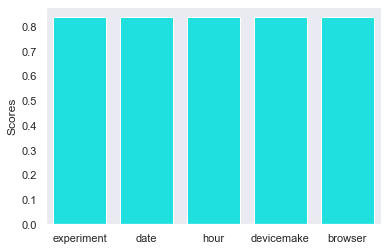

In [38]:
# plotting the accuracy score
sns.set(style="dark", rc={"lines.linewidth": 9})
sns.barplot(x=['experiment','date','hour','devicemake','browser'],y="Scores",data=scores1, color="cyan")
plt.show()
sns.set()

In [39]:
#feature coefficients
regressor.fit(X1 / np.std(X1, 0), y1)
print(regressor.coef_)

[[ 0.45154087 -0.00618303 -0.12031708  0.64892178 -0.23219142]]


In [92]:
#plotting the feature importance
#The coefficients are both positive and negative.
# logistic regression for feature importance
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00049
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00263
Feature: 3, Score: 0.03830
Feature: 4, Score: 0.00047


* So the most important feature in this model is feature 2 (devicemake) with a score of 0.03830

## Analysis of the P-value

In [93]:
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X1_train, y1_train)
list(pvalues)

[0.0, 0.0, 6.507421623458208e-262, 0.0, 0.0]

#### P-value mest be lessthan  0.05 to be a significant 
 - all columns are significant and the most significant column is `hour`

### 1.2 Using platform df

In [43]:
# Applying the 5-fold Cross validation on logistic Regression model
regressor=LogisticRegression(random_state=None)
regressor.fit(X11_train,y11_train) 
scores=cross_val_score(estimator=regressor,X=X11_train,y=y11_train,cv=5,scoring='accuracy')
print(scores)
print('Mean LogisticRegression score :',scores.mean())

[0.83695925 0.83876802 0.83434658 0.83835795 0.83825746]
Mean LogisticRegression score : 0.8373378547496915


In [44]:
# saving the output to a pandas dataframe
scores1 = pd.DataFrame(scores,columns=['Scores']) 
scores1.head()

,Scores
0,0.836959
1,0.838768
2,0.834347
3,0.838358
4,0.838257


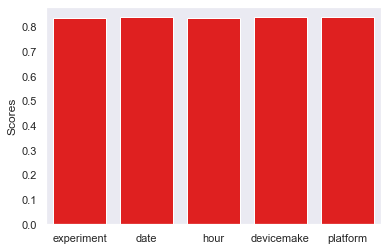

In [46]:
# plotting the accuracy score
sns.set(style="dark", rc={"lines.linewidth": 9})
sns.barplot(x=['experiment','date','hour','devicemake','platform'],y="Scores",data=scores1, color="red")
plt.show()
sns.set()

In [47]:
#feature coefficients
regressor.fit(X11 / np.std(X11, 0), y11)
print(regressor.coef_)

[[ 0.43870027 -0.00759631 -0.11492202  0.68768531 -0.18342688]]


In [48]:
#plotting the feature importance
#The coefficients are both positive and negative.
# logistic regression for feature importance
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X11, y11)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00100
Feature: 1, Score: 0.00001
Feature: 2, Score: -0.00105
Feature: 3, Score: 0.03955
Feature: 4, Score: -0.01440


* Again, the most important feature in this model is feature 4 (`devicemake`) with a score of 0.03955.

In [52]:
#Adding scripts path
import sys, os
sys.path.insert(0,'../scripts/')

from Reg_script import LogesticRegressionModel
LRModel = LogesticRegressionModel(X1_train, X1_test,  y1_train, y1_test)
clf2, loss_arr_2, acc_arr_2 = LRModel.train(5)
LRModel.write_model('browser_os_Logestic_Reg_model', clf2)

step 0: Validation Accuracy of LogesticRegression is: 0.843
step 0: Validation Loss of LogesticRegression is: 0.396

step 1: Validation Accuracy of LogesticRegression is: 0.835
step 1: Validation Loss of LogesticRegression is: 0.406

step 2: Validation Accuracy of LogesticRegression is: 0.835
step 2: Validation Loss of LogesticRegression is: 0.406

step 3: Validation Accuracy of LogesticRegression is: 0.839
step 3: Validation Loss of LogesticRegression is: 0.402

step 4: Validation Accuracy of LogesticRegression is: 0.840
step 4: Validation Loss of LogesticRegression is: 0.400



### Evaluating the model LogesticRegressionModel

### the P-valueof the feature 

In [91]:
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X11_train, y11_train)
list(pvalues)

[0.0, 0.0, 6.507421623458208e-262, 0.0, 0.0]

## Analysis of the result 
### TO HAVE SIGINIFICANCE THE P-VALUE MUST BE LESS THAT 0.05
- all columns are significant and the most significant column is `hour`

# 2. XGBOOST

### 2.1 Using Browser Df

In [50]:
# Define XGBoost Model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# We fit our model with our train data
xgb.fit(
    X1_train, y1_train,
    # That means if model don't improve it self in 5 rounds, it will stop learning
    # So you can save your time and don't overtrain your model.
    early_stopping_rounds=5,
    # We provide Test data's to evaluate model performance
    eval_set=[(X1_test, y1_test)],
    verbose=False
 )
# Then predict results from X_test data
pred_xgb = xgb.predict(X1_test)

# See First 10 Predictions and They Actual Values
# print("Predicted:", pred_xgb[0:10])
print("Actual:", y1_test[0:10])

C:\Users\Ekubay\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Actual: 49068    1
12212    1
94423    0
60602    1
86060    1
50512    1
30603    1
66432    1
10618    1
29368    1
Name: response, dtype: int64


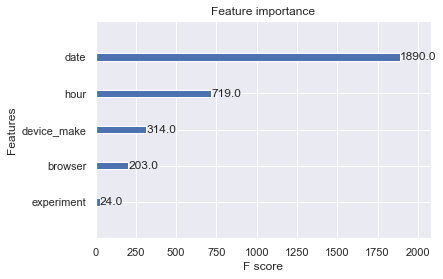

In [51]:
from xgboost import plot_importance
# fit model no training data
model = XGBClassifier()
model.fit(X1, y1)
# plot feature importance
plot_importance(model)
pyplot.show()

* Using this model, `date` is the most important feature in predicting the target variable response.

### 2.2 Using platform DF

In [57]:
# Define XGBoost Model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# We fit our model with our train data
xgb.fit(
    X11_train, y11_train,
    # That means if model don't improve it self in 5 rounds, it will stop learning
    # So you can save your time and don't overtrain your model.
    early_stopping_rounds=5,
    # We provide Test data's to evaluate model performance
    eval_set=[(X11_test, y11_test)],
    verbose=False
 )
# Then predict results from X_test data
pred_xgb = xgb.predict(X11_test)

# See First 10 Predictions and They Actual Values
# print("Predicted:", pred_xgb[0:10])
print("Actual:", y11_test[0:10])

Actual: 49068    1
12212    1
94423    0
60602    1
86060    1
50512    1
30603    1
66432    1
10618    1
29368    1
Name: response, dtype: int64


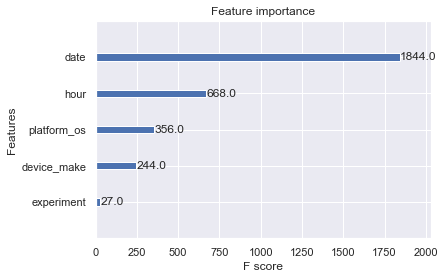

In [59]:
# fit model no training data
model = XGBClassifier()
model.fit(X11, y11)
# plot feature importance
plot_importance(model)
pyplot.show()

* For the same model, but using platform dataframe, again `date` is the most important feature in predicting the target variable response.

In [69]:
import sys, os
sys.path.insert(0,'../scripts/')

from Reg_script import XGBClassifierModel

xGBClassifierModel = XGBClassifierModel(X1_train, X1_test,  y1_train, y1_test)
clf3, acc_arr, loss_arr = xGBClassifierModel.train(5)
xGBClassifierModel.write_model('browser_os_XGBoost_model', clf2)

### *evaluating the model

# 3. Random forest

### 3.1 Using browser df

In [70]:
# Define Random forest Model
rf = RandomForestClassifier()
# We fit our model with our train data
rf.fit(X1_train, y1_train)
# Then predict results from X_test data
pred_rf = rf.predict(X1_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_rf[0:10])
print("Actual:", y1_test[0:10])

Predicted: [1 1 1 1 1 1 1 1 1 0]
Actual: 49068    1
12212    1
94423    0
60602    1
86060    1
50512    1
30603    1
66432    1
10618    1
29368    1
Name: response, dtype: int64


In [71]:
#Applying k-fold Cross validation on random forest
clf = RandomForestClassifier()
clf.fit(X1_train,y1_train)
clf_scores=cross_val_score(estimator=clf,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
print(clf_scores)
print('Mean clf score :',clf_scores.mean())

[0.7983721  0.79982917 0.79786967 0.80007034 0.79313637]
Mean clf score : 0.7978555313943917


In [72]:
scores2 = pd.DataFrame(clf_scores,columns=['Scores2']) # saving the results into pandas dataframe
scores2.head()

,Scores2
0,0.798372
1,0.799829
2,0.797870
3,0.800070
4,0.793136


In [73]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

Feature: 0, Score: 0.03603
Feature: 1, Score: 0.75372
Feature: 2, Score: 0.06361
Feature: 3, Score: 0.12345
Feature: 4, Score: 0.02319


* Random forest algorithm, using browser_dataframe, feature 2 (date) is the most important feature in predicting the target variable response.

### 3.2 Using platform DF

In [74]:
# Define Decision Tree Model
rf = RandomForestClassifier()
# We fit our model with our train data
rf.fit(X11_train, y11_train)
# Then predict results from X_test data
pred_rf = rf.predict(X11_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_rf[0:10])
print("Actual:", y11_test[0:10])

Predicted: [1 0 1 1 1 1 1 1 1 1]
Actual: 49068    1
12212    1
94423    0
60602    1
86060    1
50512    1
30603    1
66432    1
10618    1
29368    1
Name: response, dtype: int64


In [33]:
#Applying k-fold Cross validation on Decision tree
clf = RandomForestClassifier()
clf.fit(X11_train,y11_train)
clf_scores=cross_val_score(estimator=clf,X=X11_train,y=y11_train,cv=5,scoring='accuracy')
print(clf_scores)
print('Mean clf score :',clf_scores.mean())

[0.56696429 0.51785714 0.5625     0.56502242 0.5470852 ]
Mean clf score : 0.5518858103779628


In [75]:
scores2 = pd.DataFrame(clf_scores,columns=['Scores2']) # saving the results into pandas dataframe
scores2.head()

,Scores2
0,0.798372
1,0.799829
2,0.797870
3,0.800070
4,0.793136


In [76]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

Feature: 0, Score: 0.01699
Feature: 1, Score: 0.67376
Feature: 2, Score: 0.10500
Feature: 3, Score: 0.19203
Feature: 4, Score: 0.01222


* Random forest algorithm, using platform_dataframe, feature 2 (date) is the most important feature in predicting the target variable response.

In [77]:
import sys, os
sys.path.insert(0,'../scripts/')

from Reg_script import RandomForest

RForest = RandomForest(X1_train, X1_test,  y1_train, y1_test)
clf3, acc_arr, loss_arr = RForest.train(5)
RForest.write_model('browser_os_RForest_model', clf3)

step 0: Validation Accuracy of RandomForest is: 0.801
step 0: Validation Loss of Randomforest is: 0.446

step 1: Validation Accuracy of RandomForest is: 0.798
step 1: Validation Loss of Randomforest is: 0.449

step 2: Validation Accuracy of RandomForest is: 0.797
step 2: Validation Loss of Randomforest is: 0.451

step 3: Validation Accuracy of RandomForest is: 0.801
step 3: Validation Loss of Randomforest is: 0.446

step 4: Validation Accuracy of RandomForest is: 0.793
step 4: Validation Loss of Randomforest is: 0.454



## calculatting P-value

In [79]:
# calculating p-value
def get_p_values(df):
    """ 
    Calcualting p_values for logestic regression.
    code refered from the following link
    https://gist.github.com/rspeare/77061e6e317896be29c6de9a85db301d
    
    """
    denom = (2.0*(1.0+np.cosh(df.clf.decision_function(X))))
    denom = np.tile(denom,(X.shape[1],1)).T
    F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
    Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
    sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
    z_scores = df.clf.coef_[0]/sigma_estimates # z-score 
    p_values = [stat.norm.sf(abs(x)) for x in z_scores] ### two tailed test for p-values
    
    p_df = pd.DataFrame()
    p_df['features'] = df.X_train.columns.to_list()
    p_df['p_values'] = p_values
    
    return p_df
    
def plot_pvalues(self, p_df):
        
    fig, ax = plt.subplots(figsize=(12,7))

    ax.plot([0.05,0.05], [0.05,5])
    sns.scatterplot(data=p_df, y='features', x='p_values', color="green")
    plt.title("P values of features", size=20)

    plt.xticks(np.arange(0,max(p_df['p_values']) + 0.05, 0.05))

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()

In [83]:
# p_values_df = get_p_values(RForest)
# plot_pvalues(RForest,p_values_df)
# p_values_df

# Accuracy scores

In [78]:
##y1_test - Actual value
## pred_[model] = the values predicted above

# Logistic Regression
acc_log = accuracy_score(y1_test, pred_log)
# XGBoost 
acc_xgb = accuracy_score(y1_test, pred_xgb)
# Random Forest 
acc_rf = accuracy_score(y1_test, pred_rf)


print("Accuracy Scores")
print("---------------")

print("Logistic Regression:", acc_log)
print("XGBoost:", acc_xgb)
print("Random Forest:", acc_rf)

Accuracy Scores
---------------
Logistic Regression: 0.8449850773265805
XGBoost: 0.8530342769286425
Random Forest: 0.8041059962015014


# So from the above scores we can conclude that both XG boost and LRyeild the best results while RF is the worst from the 3.
- comparing to the AdSmartAB data set, the later model shows huge amount of improvement on crating awearness over the people related to the advert.